In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
dataset = pd.read_csv('PDFMalware2022.csv')
dataset.drop(["Fine name"], axis=1, inplace=True)

dataset

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,\t%PDF-\x07.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [58]:
from sklearn.preprocessing import OrdinalEncoder
object_columns = dataset.select_dtypes(include=['object']).columns

In [59]:
dataset[object_columns]

,images,text,header,obj,endobj,endstream,xref,startxref,pageno,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Class
0,0,No,\t%PDF-1.3,10,10,3,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious
1,0,No,\t%PDF-1.6,19,19,9,1,1,1,0,0,0,0,1,0,0,0,8,1,Malicious
2,0,Yes,\t%PDF-1.3,12,12,3,1,1,2,1,2,0,1,0,0,0,0,0,0,Malicious
3,0,No,\t%PDF-1.3,14,14,2,1,1,1,2,3,0,1,1,0,0,0,0,0,Malicious
4,0,Yes,\t%PDF-1.3,15,15,4,1,1,3,1,2,0,1,0,0,0,0,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,3,No,\t%PDF-1.3,9,9,3,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious
10022,-1,unclear,\t%PDF-\x07.3,8,7,2,1,1,1,1(1),1,0,1,0,0,0,0,0,0,Malicious
10023,0,Yes,\t%PDF-1.3,8,8,2,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious
10024,0,Yes,\t%PDF-1.3,9,9,3,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious


In [60]:
encoder = OrdinalEncoder()
encoder.fit(dataset[object_columns])
dataset[object_columns] = encoder.transform(dataset[object_columns])

In [61]:
dataset.dropna(inplace=True)

In [89]:
y = dataset['Class']
X = dataset.drop(['Class'], axis = 1)
y = y.astype(int)

In [90]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(X)
X_mm = mm.transform(X)

In [91]:
X_mm

array([[3.77881345e-04, 2.34498484e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [6.71789058e-04, 2.91503641e-03, 1.67785235e-03, ...,
        9.44444444e-01, 3.33333333e-01, 1.75963400e-04],
       [2.09934081e-04, 6.07623144e-03, 5.03355705e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       ...,
       [2.09934081e-04, 4.89726116e-03, 5.03355705e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [1.63748583e-03, 4.39198818e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [1.25960448e-04, 2.34498484e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04]])

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mm, y, train_size=0.8)

**SMOTE**

In [105]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [106]:
X_smote

array([[1.80543309e-03, 3.40735367e-03, 6.71140940e-03, ...,
        5.55555556e-02, 1.66666667e-01, 5.27890199e-04],
       [2.01536717e-03, 2.34498484e-03, 6.71140940e-03, ...,
        9.44444444e-01, 3.33333333e-01, 1.75963400e-04],
       [6.59193013e-03, 4.49563392e-03, 8.38926174e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       ...,
       [1.13372735e-03, 3.87375949e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [8.39736323e-05, 4.57726825e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [7.39352846e-03, 4.48187002e-03, 8.38926174e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04]])

In [107]:
y_smote

0       0
1       1
2       0
3       1
4       1
       ..
8833    0
8834    0
8835    0
8836    0
8837    0
Name: Class, Length: 8838, dtype: int32

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
model = DecisionTreeClassifier()

In [110]:
model.fit (X_train, y_train)

DecisionTreeClassifier()

In [111]:
import time

start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

execution_time = end_time - start_time
print("Thời gian thực hiện: ", execution_time, "giây")


Thời gian thực hiện:  0.0010120868682861328 giây


In [114]:
len(X_test)

2005

In [112]:
y_test

3038    1
4813    1
5423    0
323     1
7660    0
       ..
9682    0
6284    0
571     1
2324    1
4732    1
Name: Class, Length: 2005, dtype: int32

In [101]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [102]:
from sklearn.metrics import classification_report

In [103]:
print (classification_report (y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.98551   0.98441   0.98496       898
           1    0.98414   0.98526   0.98470       882

    accuracy                        0.98483      1780
   macro avg    0.98483   0.98484   0.98483      1780
weighted avg    0.98483   0.98483   0.98483      1780



**CONFUSION MATRIX**

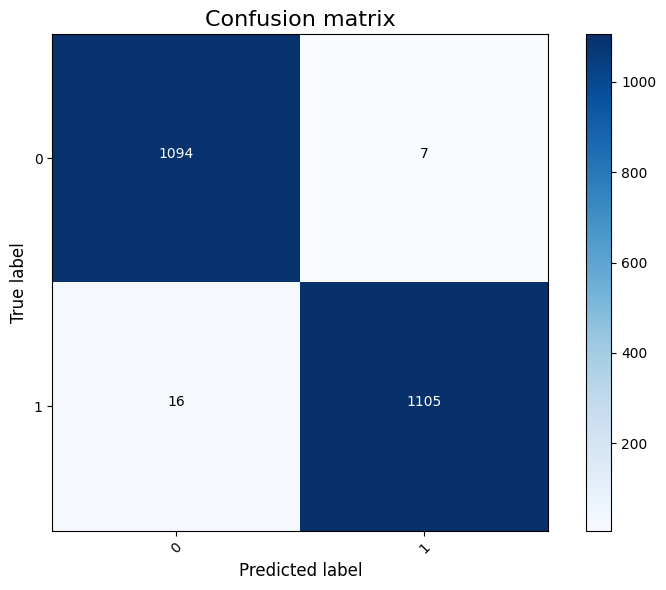

In [78]:
from sklearn.metrics import confusion_matrix
import itertools

# Danh sách dữ liệu mẫu y_true và y_pred
y_true = y_test

# Lấy các nhãn duy nhất từ y_true và y_pred để biết số lượng lớp
labels = np.unique(y_true)

# Tính confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Chuẩn bị vẽ confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix', fontsize=16)
plt.colorbar()

# Định dạng các trục x và y
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Định dạng các giá trị trên ô
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Đặt tên trục và hiển thị
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.tight_layout()
plt.show()
